In [1]:
#importing necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid = pd.read_csv('full_grouped.csv')
covid

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa


In [3]:
covid.head()
#displaying first 5 rows

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [4]:
covid.tail()
#displaying last 5 rows

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa
35155,2020-07-27,Zimbabwe,2704,36,542,2126,192,2,24,Africa


In [5]:
covid.shape
#displaying numbers of (rows, columns)

(35156, 10)

In [6]:
covid.size
#displaying the dataframe size

351560

In [7]:
covid.columns
#displaying all the columns name 

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

In [8]:
covid = covid.rename(columns={'Country/Region':'Country'})
#renaming for easier use 

In [9]:
covid.info()
#displaying valuable information of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           35156 non-null  object
 1   Country        35156 non-null  object
 2   Confirmed      35156 non-null  int64 
 3   Deaths         35156 non-null  int64 
 4   Recovered      35156 non-null  int64 
 5   Active         35156 non-null  int64 
 6   New cases      35156 non-null  int64 
 7   New deaths     35156 non-null  int64 
 8   New recovered  35156 non-null  int64 
 9   WHO Region     35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [10]:
covid.describe()
#displaying the statistical properties of dataframe

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
count,3.515600e+04,35156.000000,3.515600e+04,3.515600e+04,35156.00000,35156.000000,35156.000000
mean,2.356663e+04,1234.068239,1.104813e+04,1.128443e+04,469.36375,18.603339,269.315593
std,1.499818e+05,7437.238354,6.454640e+04,8.997149e+04,3005.86754,115.706351,2068.063852
min,0.000000e+00,0.000000,0.000000e+00,-2.000000e+00,0.00000,-1918.000000,-16298.000000
25%,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000
50%,2.500000e+02,4.000000,3.300000e+01,8.500000e+01,2.00000,0.000000,0.000000
75%,3.640250e+03,78.250000,1.286250e+03,1.454000e+03,75.00000,1.000000,20.000000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,77255.00000,3887.000000,140050.000000


In [11]:
covid.describe(include=object).T
#displaying information about non-numeric columns

,count,unique,top,freq
Date,35156,188,2020-01-22,187
Country,35156,187,Afghanistan,188
WHO Region,35156,6,Europe,10528


In [12]:
covid.isnull().sum()
#checking for null values 

Date             0
Country          0
Confirmed        0
Deaths           0
Recovered        0
Active           0
New cases        0
New deaths       0
New recovered    0
WHO Region       0
dtype: int64

In [13]:
 covid.duplicated().sum()
#checking if the dataframe has duplicate values 

0

In [14]:
Q1 = covid['Confirmed'].quantile(0.25)
Q3 = covid['Confirmed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = covid[(covid['Confirmed'] < lower_bound) | (covid['Confirmed']> upper_bound)]
outliers
#checking for outlires in "Confirmed" column

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
1719,2020-01-31,China,9802,213,211,9378,1661,42,78,Western Pacific
1906,2020-02-01,China,11891,259,272,11360,2089,46,61,Western Pacific
2093,2020-02-02,China,16630,361,450,15819,4739,102,178,Western Pacific
2280,2020-02-03,China,19716,425,595,18696,3086,64,145,Western Pacific
2467,2020-02-04,China,23707,491,812,22404,3991,66,217,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
35145,2020-07-27,United Arab Emirates,59177,345,52510,6322,264,1,328,Eastern Mediterranean
35146,2020-07-27,United Kingdom,301708,45844,1437,254427,688,7,3,Europe
35148,2020-07-27,Uzbekistan,21209,121,11674,9414,678,5,569,Europe
35149,2020-07-27,Venezuela,15988,146,9959,5883,525,4,213,Americas


In [15]:
total_observations = len(covid)
total_outliers = len(outliers)
percentage_outliers = (total_outliers / total_observations) * 100
percentage_outliers

17.95710547275003

 - The column 'confirmed' has about 17% outliers which needs to be dealt with.
 - However, after taking a lot of factors into consideration, I have decided to leave the outliers as it is.
 - The dataset belongs to a crucial time, which is the beginning of pandemic.
 - Many of the places did not have access to necessary tools, infrastructure and personnel.
 - Major countries had their own testing methods and varying strategies to tackle the outbreak.
 - Additionally, the rapid death during this time likely contributed to challenges in data collection and reporting.

In [16]:
Q1 = covid['Deaths'].quantile(0.25)
Q3 = covid['Deaths'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = covid[(covid['Deaths'] < lower_bound) | (covid['Deaths']> upper_bound)]
outliers
#checking outliers for 'Deaths' Column

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
1719,2020-01-31,China,9802,213,211,9378,1661,42,78,Western Pacific
1906,2020-02-01,China,11891,259,272,11360,2089,46,61,Western Pacific
2093,2020-02-02,China,16630,361,450,15819,4739,102,178,Western Pacific
2280,2020-02-03,China,19716,425,595,18696,3086,64,145,Western Pacific
2467,2020-02-04,China,23707,491,812,22404,3991,66,217,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
35142,2020-07-27,US,4290259,148011,1325804,2816444,56336,1076,27941,Americas
35144,2020-07-27,Ukraine,67096,1636,37202,28258,835,11,317,Europe
35145,2020-07-27,United Arab Emirates,59177,345,52510,6322,264,1,328,Eastern Mediterranean
35146,2020-07-27,United Kingdom,301708,45844,1437,254427,688,7,3,Europe


 - Following the same approach, leaving the outliers and moving forward.

##### Descriptive Statistics of individual column

In [17]:
Total_confirmed = covid['Confirmed'].sum()
confirmed_mean=covid['Confirmed'].mean().astype(int)
confirmed_median= covid['Confirmed'].median()
confirmed_mode = covid['Confirmed'].mode()
confirmed_std = covid['Confirmed'].std()
confirmed_range = covid['Confirmed'].max()-covid['Confirmed'].min()

print(f"Total_confirmed : { Total_confirmed}")
print(f"confirmed_mean : {confirmed_mean}")
print(f"confirmed_median : {confirmed_median}")
print(f"confirmed_mode : {confirmed_mode}")
print(f"confirmed_std : {confirmed_std}")
print(f"confirmed_range : {confirmed_range}")


Total_confirmed : 828508482
confirmed_mean : 23566
confirmed_median : 250.0
confirmed_mode : 0    0
Name: Confirmed, dtype: int64
confirmed_std : 149981.83525947676
confirmed_range : 4290259


In [18]:
Total_deaths = covid['Deaths'].sum()
deaths_mean=covid['Deaths'].mean().astype(int)
deaths_median= covid['Deaths'].median()
deaths_mode = covid['Deaths'].mode()
deaths_std = covid['Deaths'].std()
deaths_range = covid['Deaths'].max()-covid['Deaths'].min()

print(f"Total_deaths : { Total_deaths}")
print(f"deaths_mean : {deaths_mean}")
print(f"deaths_median : {deaths_median}")
print(f"deaths_mode : {deaths_mode}")
print(f"deaths_std : {deaths_std}")
print(f"deaths_range : {deaths_range}")

Total_deaths : 43384903
deaths_mean : 1234
deaths_median : 4.0
deaths_mode : 0    0
Name: Deaths, dtype: int64
deaths_std : 7437.238354072943
deaths_range : 148011


In [19]:
Total_recovered = covid['Recovered'].sum()
recovered_mean=covid['Recovered'].mean().astype(int)
recovered_median= covid['Recovered'].median()
recovered_mode = covid['Recovered'].mode()
recovered_std = covid['Recovered'].std()
recovered_range = covid['Recovered'].max()-covid['Recovered'].min()

print(f"Total_recovered : { Total_recovered}")
print(f"recovered_mean : {recovered_mean}")
print(f"recovered_median : {recovered_median}")
print(f"recovered_mode : {recovered_mode}")
print(f"recovered_std : {recovered_std}")
print(f"recovered_range : {recovered_range}")

Total_recovered : 388408229
recovered_mean : 11048
recovered_median : 33.0
recovered_mode : 0    0
Name: Recovered, dtype: int64
recovered_std : 64546.40078702754
recovered_range : 1846641


In [20]:
Active_cases = covid['Active'].sum()
Active_mean=covid['Active'].mean().astype(int)
Active_median= covid['Active'].median()
Active_mode = covid['Active'].mode()
Active_std = covid['Active'].std()
Active_range = covid['Active'].max() - covid['Active'].min()

print(f"Active_cases : { Active_cases}")
print(f"Active_mean : {Active_mean}")
print(f"Active_median : {Active_median}")
print(f"Active_mode : {Active_mode}")
print(f"Active_std : {Active_std}")
print(f"Active_range : {Active_range}")

Active_cases : 396715350
Active_mean : 11284
Active_median : 85.0
Active_mode : 0    0
Name: Active, dtype: int64
Active_std : 89971.4941149232
Active_range : 2816446


In [21]:
covid.columns 

Index(['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

In [22]:
Total_new_cases = covid['New cases'].sum()
new_cases_mean=covid['New cases'].mean().astype(int)
new_cases_median= covid['New cases'].median()
new_cases_mode = covid['New cases'].mode()
new_cases_std = covid['New cases'].std()
new_cases_range = covid['New cases'].max() - covid['New cases'].min()

print(f"Total_new_cases : { Total_new_cases}")
print(f"new_cases_mean : {new_cases_mean}")
print(f"new_cases_median : {new_cases_median}")
print(f"new_cases_mode : {new_cases_mode}")
print(f"new_cases_std : {new_cases_std}")
print(f"new_cases_range : {new_cases_range}")

Total_new_cases : 16500952
new_cases_mean : 469
new_cases_median : 2.0
new_cases_mode : 0    0
Name: New cases, dtype: int64
new_cases_std : 3005.867539701543
new_cases_range : 77255


In [23]:
Total_new_deaths = covid['New deaths'].sum()
new_deaths_mean=covid['New deaths'].mean().astype(int)
new_deaths_median= covid['New deaths'].median()
new_deaths_mode = covid['New deaths'].mode()
new_deaths_std = covid['New deaths'].std()
new_deaths_range = covid['New deaths'].max()-covid['New deaths'].min()

print(f"Total_new_deaths : { Total_new_deaths}")
print(f"new_deaths_mean : {new_deaths_mean}")
print(f"new_deaths_median : {new_deaths_median}")
print(f"new_deaths_mode : {new_deaths_mode}")
print(f"new_deaths_std : {new_deaths_std}")
print(f"new_deaths_range : {new_deaths_range}")

Total_new_deaths : 654019
new_deaths_mean : 18
new_deaths_median : 0.0
new_deaths_mode : 0    0
Name: New deaths, dtype: int64
new_deaths_std : 115.70635144982973
new_deaths_range : 5805


In [24]:
Total_new_recovered = covid['New recovered'].sum()
new_recovered_mean=covid['New recovered'].mean().astype(int)
new_recovered_median= covid['New recovered'].median()
new_recovered_mode = covid['New recovered'].mode()
new_recovered_std = covid['New recovered'].std()
new_recovered_range = covid['New recovered'].max()-covid['New recovered'].min()

print(f"Total_new_recovered : { Total_new_recovered}")
print(f"new_recovered_mean : {new_recovered_mean}")
print(f"new_recovered_median : {new_recovered_median}")
print(f"new_recovered_mode : {new_recovered_mode}")
print(f"new_recovered_std : {new_recovered_std}")
print(f"new_recovered_range : {new_recovered_range}")

Total_new_recovered : 9468059
new_recovered_mean : 269
new_recovered_median : 0.0
new_recovered_mode : 0    0
Name: New recovered, dtype: int64
new_recovered_std : 2068.063851645153
new_recovered_range : 156348


In [25]:
covid.head(2)
#displaying only 2 rows to view the columns

,Date,Country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe


#### Plotting different variables using matplotlib and seaborn 

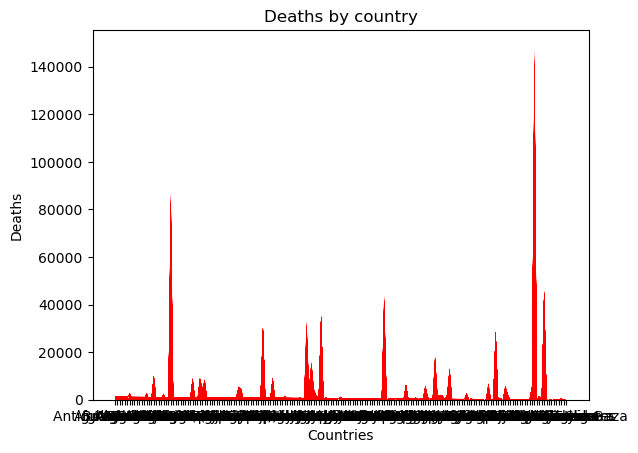

In [26]:
plt.stackplot(covid['Country'], covid['Deaths'], colors =['r', 'c'])
plt.xlabel('Countries')
plt.ylabel('Deaths')
plt.title('Deaths by country')
plt.show()

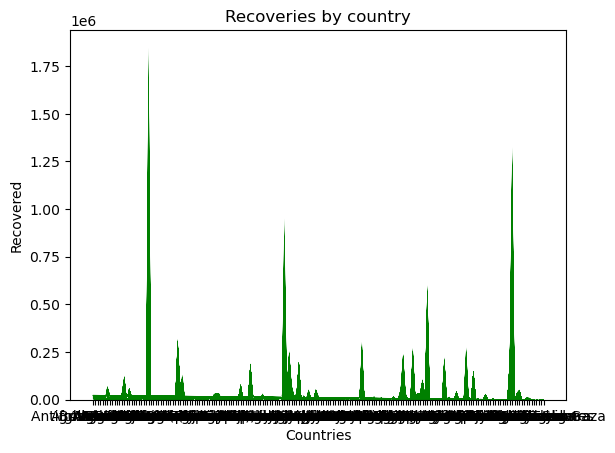

In [27]:
plt.stackplot(covid['Country'], covid['Recovered'], colors =['g', 'c'])
plt.xlabel('Countries')
plt.ylabel('Recovered')
plt.title('Recoveries by country')
plt.show()

Text(0.5, 1.0, 'Deaths by WHO Region')

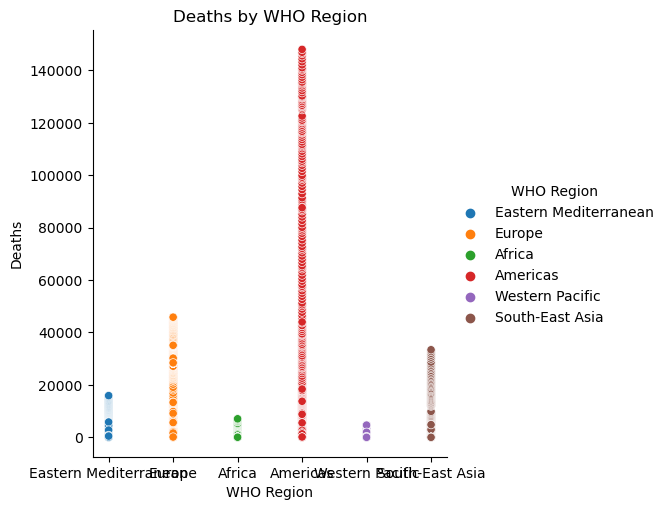

In [28]:
sns.relplot(data=covid, x="WHO Region", y="Deaths", hue = 'WHO Region')
plt.title('Deaths by WHO Region')

Text(0.5, 1.0, 'Recoveries by WHO Region')

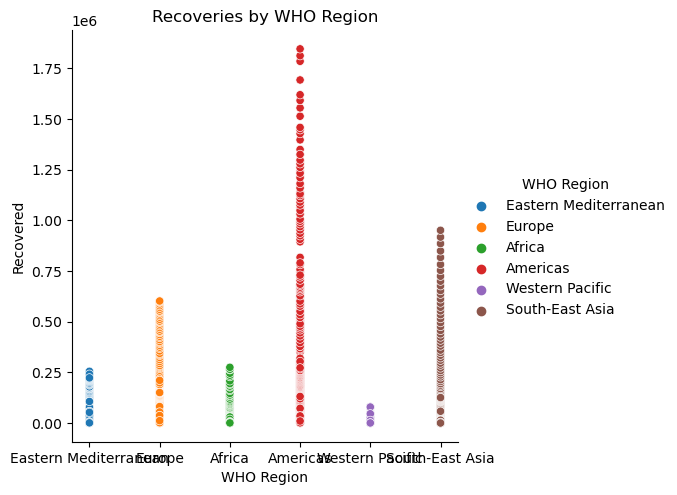

In [29]:
sns.relplot(data=covid, x="WHO Region", y="Recovered", hue = 'WHO Region')
plt.title('Recoveries by WHO Region')

Text(0.5, 1.0, 'New cases by Country')

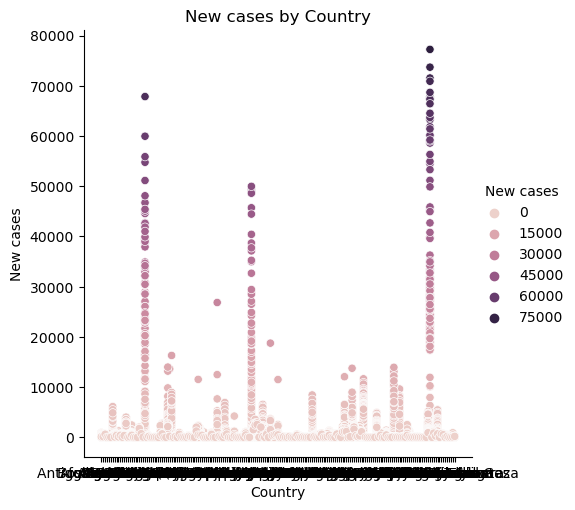

In [30]:
sns.relplot(data=covid, x="Country", y="New cases", hue = 'New cases')
plt.title('New cases by Country')

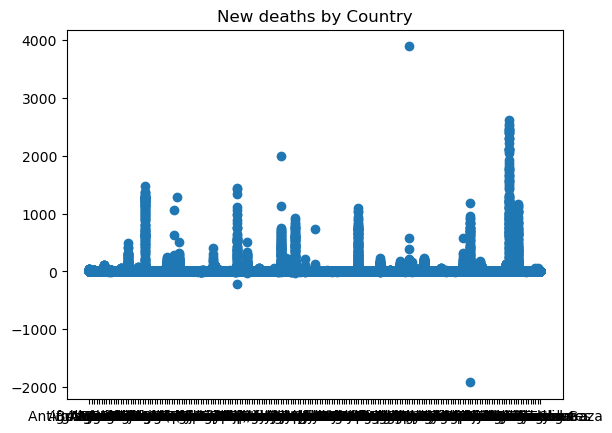

In [31]:
plt.scatter(covid['Country'],covid['New deaths'])
plt.title("New deaths by Country")
plt.show()

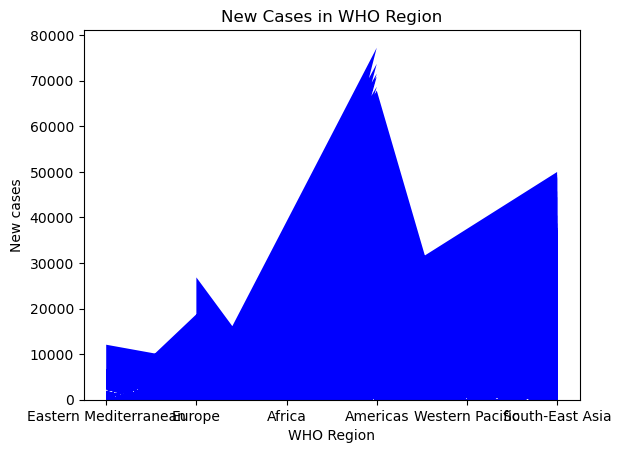

In [32]:
plt.stackplot(covid['WHO Region'], covid['New cases'], colors =['b', 'c'])
plt.xlabel('WHO Region')
plt.ylabel('New cases')
plt.title('New Cases in WHO Region')
plt.show()

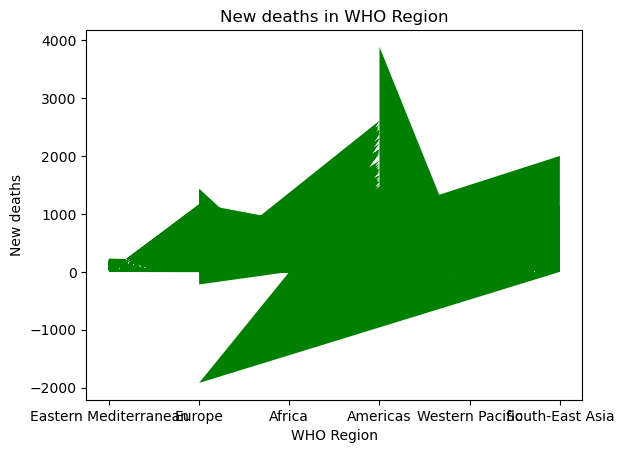

In [33]:
plt.stackplot(covid['WHO Region'], covid['New deaths'], colors =['g', 'c'])
plt.xlabel('WHO Region')
plt.ylabel('New deaths')
plt.title('New deaths in WHO Region')
plt.show()

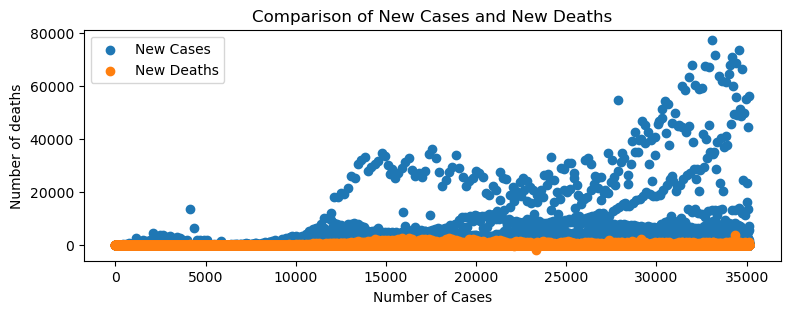

In [34]:
plt.figure(figsize=(9, 3))
plt.scatter(covid.index, covid['New cases'], label='New Cases')
plt.scatter(covid.index, covid['New deaths'], label='New Deaths')
plt.xlabel('Number of Cases')
plt.ylabel('Number of deaths')
plt.title('Comparison of New Cases and New Deaths')
plt.legend()
plt.show()

In [35]:
covid.columns

Index(['Date', 'Country', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

C:\Users\Nava Thapaliya\AppData\Local\Temp\ipykernel_16664\244466488.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(covid.corr(), annot=True, cmap="viridis")


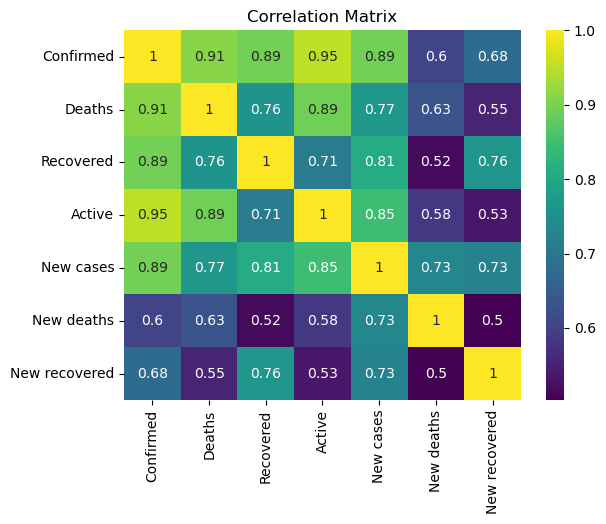

In [36]:
sns.heatmap(covid.corr(), annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()
#checking correlation between the columns

#### Correlation Values:

- The numbers within each cell represent the correlation coefficient between the two variables corresponding to that cell's row and column.
 - A value of 1 indicates a perfect positive correlation, meaning the two variables increase or decrease together.
 - A value of -1 indicates a perfect negative correlation, meaning one variable increases as the other decreases.
 - Values closer to 0 suggest a weaker or no correlation.

#### Key Observations:

 - Confirmed cases, Deaths, Recovered, and Active: These variables show strong positive correlations with each other with the smallest value being 0.71 and the highest being 0.95. This is to be expected as they are all related to the overall progression of the pandemic.
 - New cases, New deaths, and New recovered: These variables also have strong positive correlations which indicates that increases in new cases generally lead to increases in new deaths and recoveries.
 - New cases and New recovered: The correlation between these two variables is comparatively weaker than the others indicating that not all new cases result in recoveries.
 - New deaths and New recovered: The correlation between these two variables is also weaker suggesting that new cases can lead to more deaths but it doesn't necessarily mean more recoveries.
 
      The heatmap confirms the expected relationships between the variables. It shows that the overall trajectory of the pandemic is interconnected where changes in one variable affects the others.


###### Note: The value 1 is for cell's row and column that has same variables.






In [37]:
from IPython.display import Image

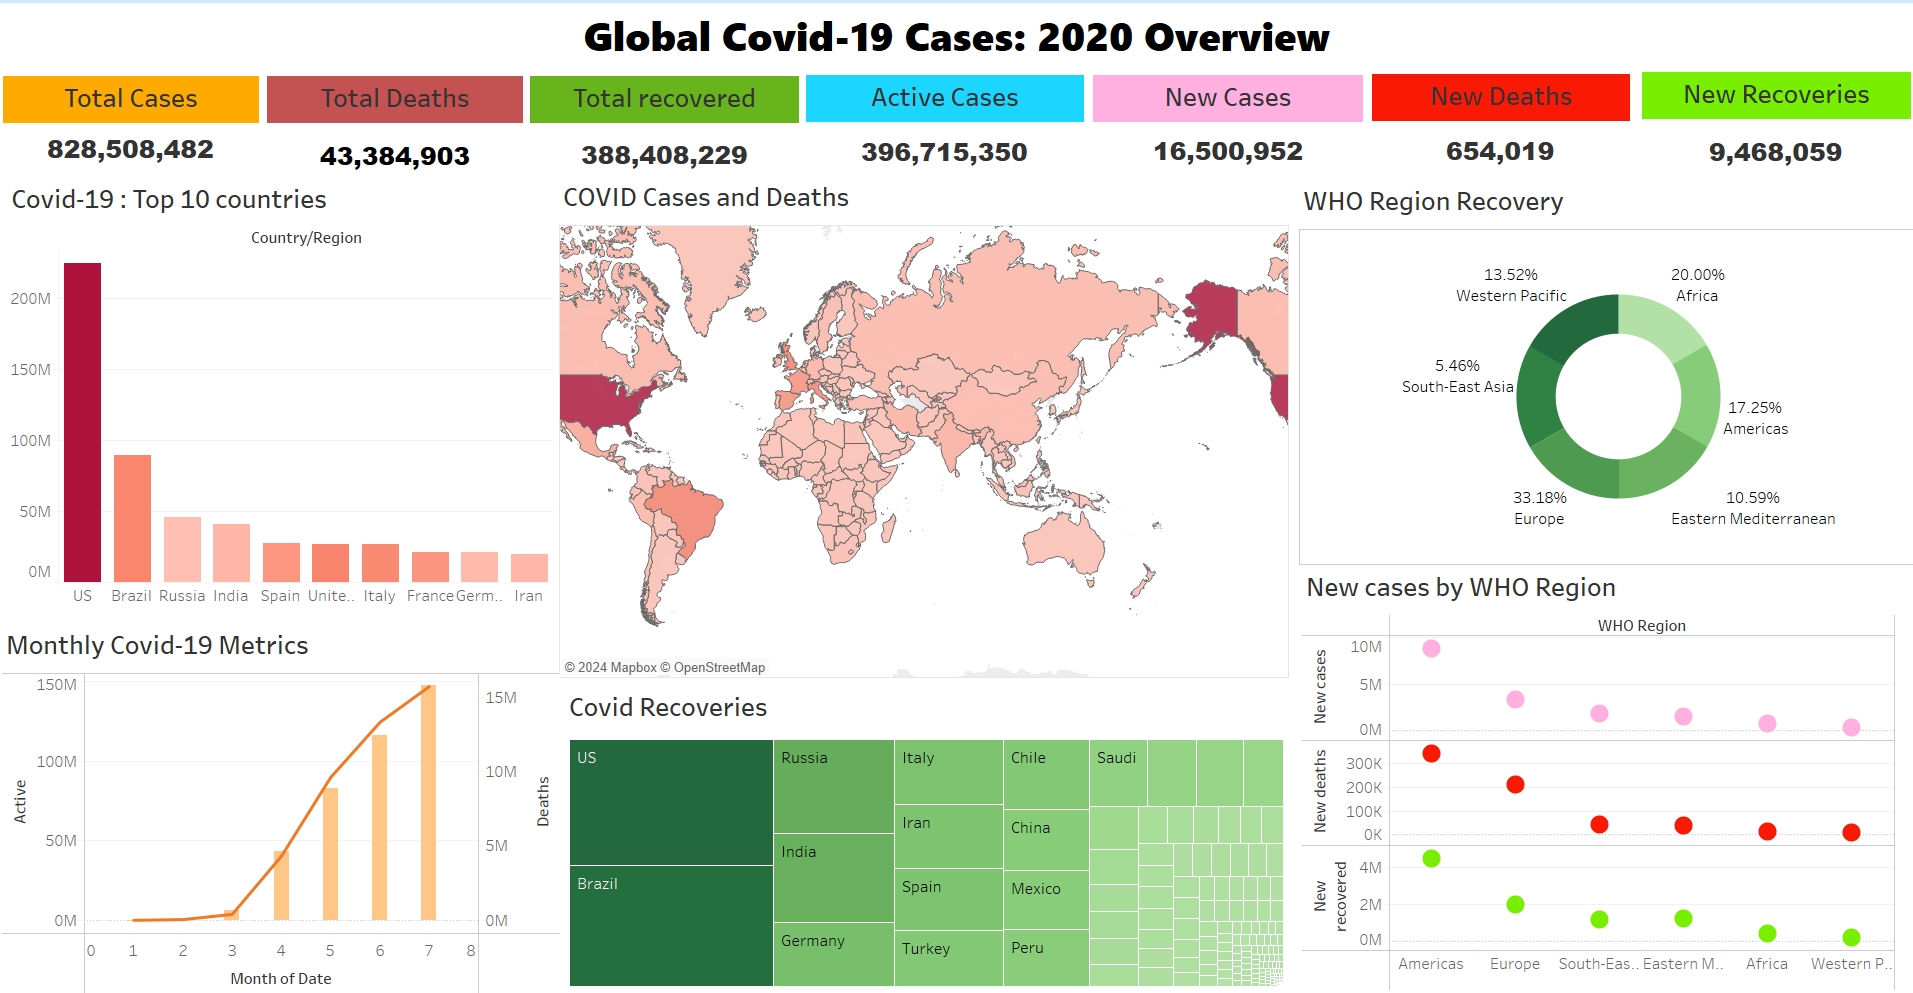

In [38]:
Image('Covid Dashboard.png')
#the dashboard created is uploaded here in the form of image